In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import  metrics as skm

In [3]:
scaled_test_features= pd.read_csv('scaled_test_features_upsampled.csv')
true_labels_ts= pd.read_csv('true_labels_ts_upsampled.csv')
features_ts_df= pd.read_csv('features_ts_df_upsampled.csv')

In [4]:
NS = tf.keras.models.load_model('Models Projeto B/NS_us')
NG = tf.keras.models.load_model('Models Projeto B/NG_us')
MG = tf.keras.models.load_model('Models Projeto B/MG_us')
MS = tf.keras.models.load_model('Models Projeto B/MS_us')

In [5]:
def model_metrics(y_true, y_pred, name, y_prob= (), prints= False, accuracy= False,
                  precision= False, f1= False, hamming_loss= False,
                  cohen_kappa= False, matthews_corr= False):
    '''Description: This function calculates the evaluation metrics of a machine learning model given the true labels (y_true) and predicted labels (y_pred). The function allows the user to specify which evaluation metrics to calculate and whether to print the results or not. The function returns a list of evaluation metrics, including accuracy, precision, F1 score, Hamming loss, Cohen's kappa score, Matthews correlation coefficient, and the name of the model.

    Parameters:
        y_true: array-like, true labels of the data
        y_pred: array-like, predicted labels of the data
        name: str, name of the machine learning model
        y_prob: array-like, optional, default (), predicted probabilities of the data (only required for some evaluation metrics)
        prints: bool, optional, default False, whether to print the evaluation metrics or not
        accuracy: bool, optional, default False, whether to calculate accuracy or not
        precision: bool, optional, default False, whether to calculate precision or not
        f1: bool, optional, default False, whether to calculate F1 score or not
        hamming_loss: bool, optional, default False, whether to calculate Hamming loss or not
        cohen_kappa: bool, optional, default False, whether to calculate Cohen's kappa score or not
        matthews_corr: bool, optional, default False, whether to calculate Matthews correlation coefficient or not
    Returns: a list of evaluation metrics including accuracy, precision, F1 score, Hamming loss, Cohen's kappa score, Matthews correlation coefficient, and the name of the model.
    '''
    if accuracy:
        acc= skm.accuracy_score(y_true, y_pred)
    else:
        acc= 0
    if precision:
        prec= skm.precision_score(y_true, y_pred, average= 'weighted')
    else:
        prec= 0
    if f1:
        f1score= skm.f1_score(y_true, y_pred, average= 'weighted')
    else:
        f1score= 0
    if hamming_loss:
        h_loss= skm.hamming_loss(y_true, y_pred)
    else:
        h_loss= 0
    if cohen_kappa:
        ckappa= skm.cohen_kappa_score(y_true, y_pred)
    else:
        ckappa= 0
    if matthews_corr:
        mcc= skm.matthews_corrcoef(y_true, y_pred)
    else:
        mcc= 0
    if prints:
        if accuracy:
            print('The accuracy score is:', acc)
        if precision:
            print('The precision score is:', prec)
        if f1:
            print('The F1 score is:', f1score)
        if hamming_loss:
            print('The Hamming loss is:', h_loss)
        if cohen_kappa:
            print('Cohens kappa score is:', ckappa)
        if matthews_corr:
            print('Matthews Correlation Coefficient:', mcc)
    return [acc, prec, f1score, h_loss, ckappa, mcc, name]

In [6]:
activity_id_dict= {0:4, 1:5, 2:6, 3:7, 4:24}

765/765 [==============================] - 2s 2ms/step
The accuracy score is: 0.9909659485753995
The precision score is: 0.9910532835376439
The F1 score is: 0.9909661331915
The Hamming loss is: 0.009034051424600417
Cohens kappa score is: 0.9887064816347676
Matthews Correlation Coefficient: 0.9887281596217994


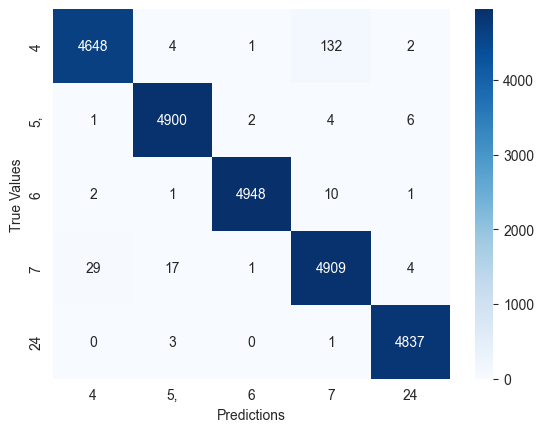

In [7]:
NS_predicts= NS.predict(features_ts_df)
NS_predicts = np.argmax(NS_predicts, axis=1)
NS_predicts= pd.DataFrame(NS_predicts)[0].replace(activity_id_dict)
#NS_prob= NS.predict_proba(features_ts_df)
ns_cnf_mat= skm.confusion_matrix(true_labels_ts, NS_predicts)

#plt.figure(figsize= (10,10))
categories= ['4', '5,', '6', '7', '24']
sns.heatmap(ns_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NS_metrics= model_metrics(true_labels_ts, NS_predicts, 'NS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

765/765 [==============================] - 2s 3ms/step
The accuracy score is: 0.9936639005845562
The precision score is: 0.9936716558628893
The F1 score is: 0.9936582357001712
The Hamming loss is: 0.006336099415443731
Cohens kappa score is: 0.9920793534535335
Matthews Correlation Coefficient: 0.9920840434580865


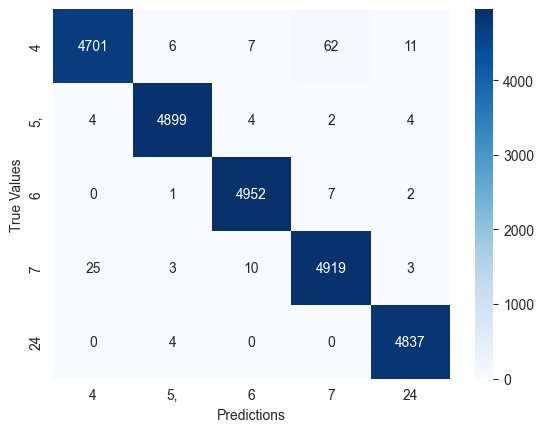

741/765 [============================>.] - ETA: 0s

In [8]:
NG_predicts= NG.predict(features_ts_df)
NG_predicts = np.argmax(NG_predicts, axis=1)
NG_predicts= pd.DataFrame(NG_predicts)[0].replace(activity_id_dict)

ng_cnf_mat= skm.confusion_matrix(true_labels_ts, NG_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(ng_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NG_metrics= model_metrics(true_labels_ts, NG_predicts, 'NG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

765/765 [==============================] - 2s 2ms/step
The accuracy score is: 0.995339901075093
The precision score is: 0.9953681078582008
The F1 score is: 0.995339423013168
The Hamming loss is: 0.004660098924907002
Cohens kappa score is: 0.9941745991318455
Matthews Correlation Coefficient: 0.9941819901810637


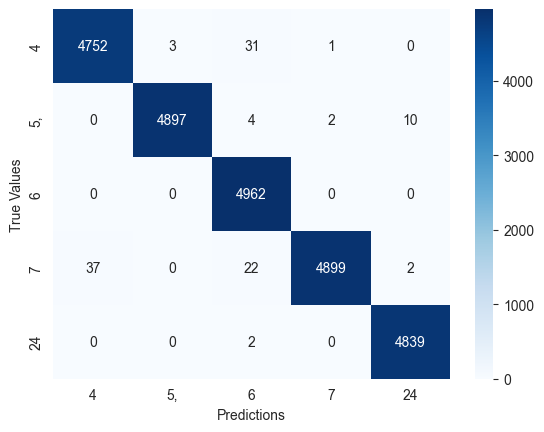

In [9]:
MG_predicts= MG.predict(scaled_test_features)
MG_predicts = np.argmax(MG_predicts, axis=1)
MG_predicts= pd.DataFrame(MG_predicts)[0].replace(activity_id_dict)

mg_cnf_mat= skm.confusion_matrix(true_labels_ts, MG_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(mg_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MG_metrics= model_metrics(true_labels_ts, MG_predicts, 'MG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                           matthews_corr= True)

765/765 [==============================] - 2s 2ms/step
The accuracy score is: 0.990475411846462
The precision score is: 0.990578683232772
The F1 score is: 0.9904800647190645
The Hamming loss is: 0.009524588153537995
Cohens kappa score is: 0.98809362082747
Matthews Correlation Coefficient: 0.9881169967141931


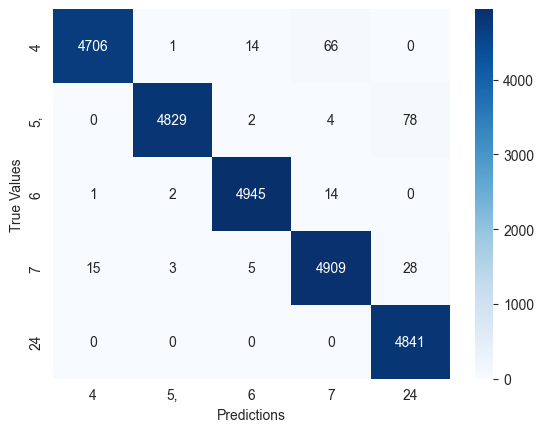

In [10]:
MS_predicts= MS.predict(scaled_test_features)
MS_predicts = np.argmax(MS_predicts, axis=1)
MS_predicts= pd.DataFrame(MS_predicts)[0].replace(activity_id_dict)

ms_cnf_mat= skm.confusion_matrix(true_labels_ts, MS_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(ms_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MS_metrics= model_metrics(true_labels_ts, MS_predicts, 'MS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

In [11]:
metrics= np.array([NS_metrics,NG_metrics, MG_metrics, MS_metrics])
metric_df= pd.DataFrame(data= metrics, columns= ['Accuracy', 'Precision', 'F1 Score', 'Hamming loss',
                                                 'Cohens Kappa', 'Matthews Correlation', 'Model Name']
                        ,index= ['NS', 'NG', 'MG', 'MS']).drop('Hamming loss', axis= 1)
hl= np.array([[NS_metrics[i] for i in [3,6]], [NG_metrics[i] for i in [3,6]],
             [MG_metrics[i] for i in [3,6]], [MS_metrics[i] for i in [3,6]]])
hl_df= pd.DataFrame(data= hl, columns= ['Hamming loss', 'Model Name'])

In [12]:
metrics_exp= pd.melt(frame = metric_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
metrics_exp= metrics_exp.astype({'value':'float'})
hl_exp= pd.melt(frame = hl_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
hl_exp= hl_exp.astype({'value':'float'})

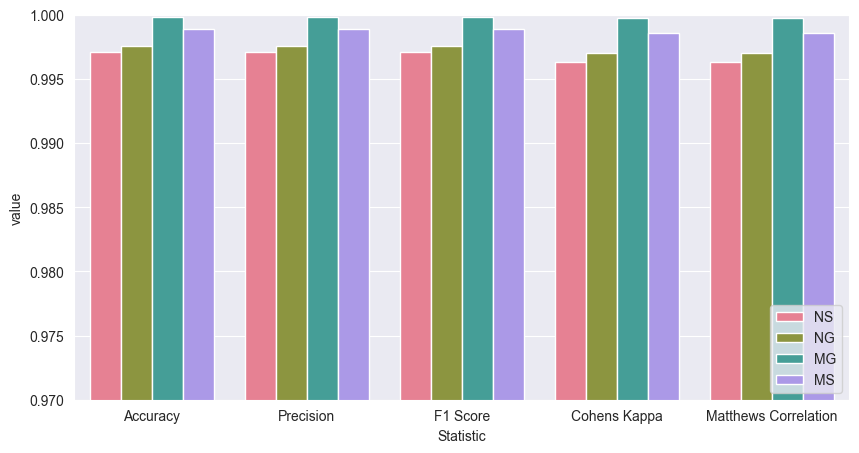

In [14]:
plt.figure(figsize= (10,5))
sns.barplot(data = metrics_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0.97, 1]);
plt.legend(loc='lower right')

(0.0, 0.01)

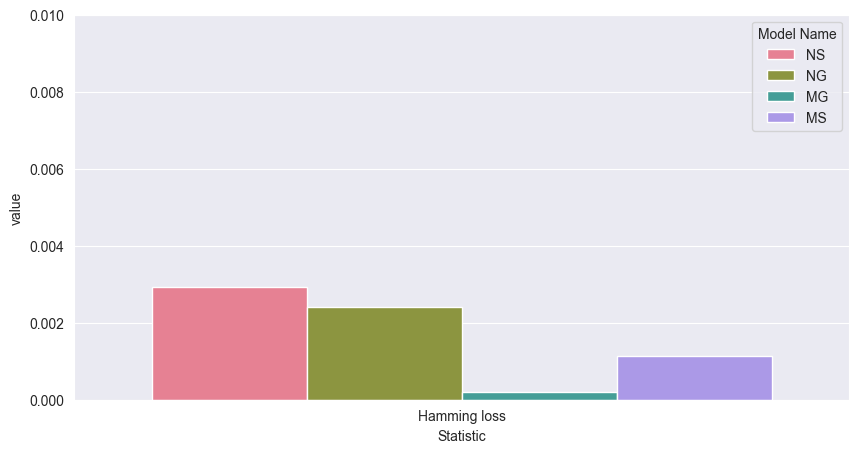

In [16]:
plt.figure(figsize= (10,5))
sns.barplot(data = hl_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0, 0.01])